# Лабораторная работа №1. Регрессия

**Тема:** *Сравнение линейной регрессии, случайного леса (Random Forest Regressor), градиентного бустинга (XGBoost) на задаче регрессии.*

**Цели:**

- *Научиться строить, оптимизировать и оценивать регрессионные модели.*
- *Понять, как интерпретировать важность признаков (feature importance).*
- *Понять, как увеличивать кол-во признаков (feature tuning).*
- *Исследовать влияние преобразований признаков (фичей), регуляризации и гиперпараметров.*

**Условия:**

- *numpy, pandas, scikit-learn, XGBoost*
- *выбрать датасет для 1-ой и 2-ой лабораторной работы*

**Пункты:**

1. Подготовка данных + Feature Tuning
2. Создание метрик
3. Базовая модель линейной регрессии
4. Улучшение линейной регрессии
5. Случайный лес регрессор
6. Градиентный бустинг (XGBoost)
7. Feature Importance
8. Написание своих реализаций (классы)
9. Подведение итогов


## О команде (ЗАПОЛНИТЬ СВОИМИ ДАННЫМИ)

| Фамилия И.О.        | Группа | Роль в команде | Что делал                    |
|---------------------|--------|----------------|------------------------------|
| Ткаченко Е.А.         | 309    | Solo way       | Все сам                      |

 Датасет: [california-housing-prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices?utm_source=chatgpt.com)

## Описание датасета (ЗАПОЛНИТЬ СВОИМИ ДАННЫМИ)

Этот набор данных содержит информацию о ценах на жилье в различных районах Калифорнии, основанную на данных переписи 1990 года. В датасете представлена совокупная статистика, включая медианный доход населения района, возраст домов, среднее количество комнат и спален на домохозяйство, население, среднее количество жильцов, а также географические координаты районов.
Необходимо исследовать ключевые факторы, влияющие на стоимость недвижимости в Калифорнии
---

### Таблица признаков

| №  | Признак                  | Тип данных     | Описание                                                                               |
| -- | ------------------------ | -------------- | -------------------------------------------------------------------------------------- |
| 1  | **longitude**        | float          | показатель насколько западнее расположен дом |
| 2  | **latitude**     | float          | показатель насколько севернее расположен дом    |
| 3  | **housing_median_age**          | float          | средний возраст дома в квартале|
| 4  | **total_rooms**       | float          | общее количество комнат в блоке|
| 5  | **total_bedrooms**            | float          | общее количество спален в блоке|
| 6  | **population**  | float          | общее количество людей, проживающих в квартале  |
| 7  | **households** | float          | Общее количество домохозяйств, группа людей, проживающих в жилом блоке, для квартала.  |
| 8  | **median_income**              | float          | медианный доход домохозяйств в квартале       |
| 9  | **median_house_value**                   | float          | средняя стоимость жилья для домохозяйств в квартале |
| 10 | **ocean_proximity**            | object          | расположение дома относительно океана  |

## 0. Глобальная настройка проекта


In [1]:
RND_SEED = 21
USE_AUTO_POLY = True

## 1. Подготовка данных + Feature Tuning

### 1.1. Загрузка датасета

Подключим `Google Drive` и загрузим наш датасет используя `Pandas.DataFrame`

Подключение к гугл диску

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
from pathlib import Path

drive_path = Path('/content/drive')
drive.mount(str(drive_path))

Mounted at /content/drive


Загрузка датасета `pd.read_csv(path_to_dataset: str)`

In [3]:
file_path = drive_path / 'MyDrive' / 'housing.csv'
df = pd.read_csv(file_path)

Получение статистки по датасету, необходимую для анализа. Подумать что можно сделать и какие выводы нужны.

Посмотрим первые три строки датасета `df.head(n: int)`

In [4]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


У нас тут нет ненужный атрибутов.

In [5]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


### 1.2. Сбор основной информации

Получение общей информации `df.info()`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Получение всей статистики `df.describe()`

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Вывод:**

1. Размер датасета: 20640 записей, по 10 признакам для каждого района Калифорнии.

2. Статистика признаков
    * Географические признаки (longitude, latitude): покрывают весь штат — от 32.54 до 41.95 северной широты, от -124.35 до -114.31 западной долготы.

    * Медианный возраст домов (housing_median_age): среднее ~28.7 лет, разброс: от 1 до 52 лет. Многие районы — со старыми домами, но встречаются и совсем новые жилые кварталы.

3. Жилищные показатели:

    * Среднее количество комнат в районе — 2635; медиана — 2127

    * Среднее количество спален — 538; возможны выбросы (максимум 6445)

    * Средняя численность домохозяйств — около 500, населения — 1425

    * Mаксимум по населению: 35682 в одном районе — вероятно, крупные многоэтажные комплексы

4. Уровень дохода (median_income): среднее 3.87 (условные единицы — десятки тысяч USD), разброс: от 0.5 до 15

    * Большинство районов имеют медианный доход 2.56–4.74, отдельные — более 10.

5. Стоимость жилья (median_house_value): средняя — 206855$, медиана — 179700$. Разброс огромный: от 14999 до 500001$

    * 25% домов — дешевле 119600$, четверть — дороже 264725$. Есть районы с экстремальными ценами.

Проверка на пропуски данных `df.isnull().sum()`

In [8]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


**Вывод:** в датасете есть пропуски в столбце **total_bedrooms**. Заполним медианным значением

In [9]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

Посмотрим на распределение целевой переменной

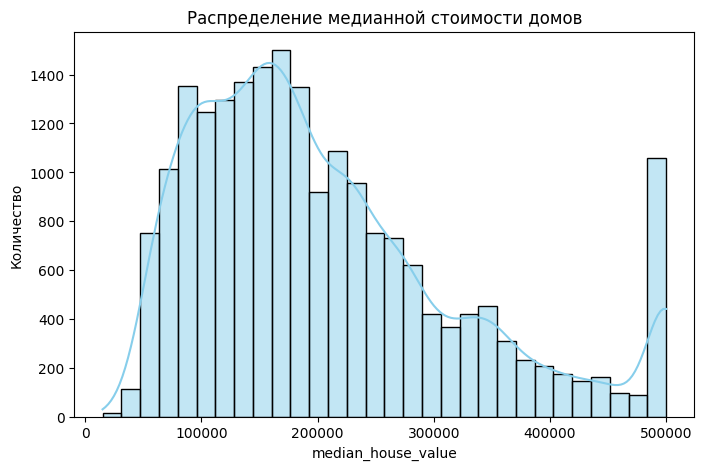

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_pie_plot(df, column_name):
    values_counts = df[column_name].value_counts(normalize=True)
    labels = [f'{round(val, 2)}' for val in values_counts.index]
    sizes = values_counts.values
    colors = sns.color_palette('pastel')[:len(sizes)]

    plt.pie(sizes, labels=labels, colors=colors, autopct='%.0f%%')
    plt.title('Распределение значений ' + column_name)
    plt.show()

def draw_histogram(df, column_name, title):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column_name], bins=30, kde=True, color='skyblue')
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Количество')
    plt.show()

draw_histogram(df, 'median_house_value', 'Распределение медианной стоимости домов')

**Вывод:** Распределение цен сильно скошено вправо

Посмотрим на корреляцию данных.

***Определение 1: Корреляция данных — это статистическая мера, показывающая, насколько и в каком направлении связаны между собой две переменные.***

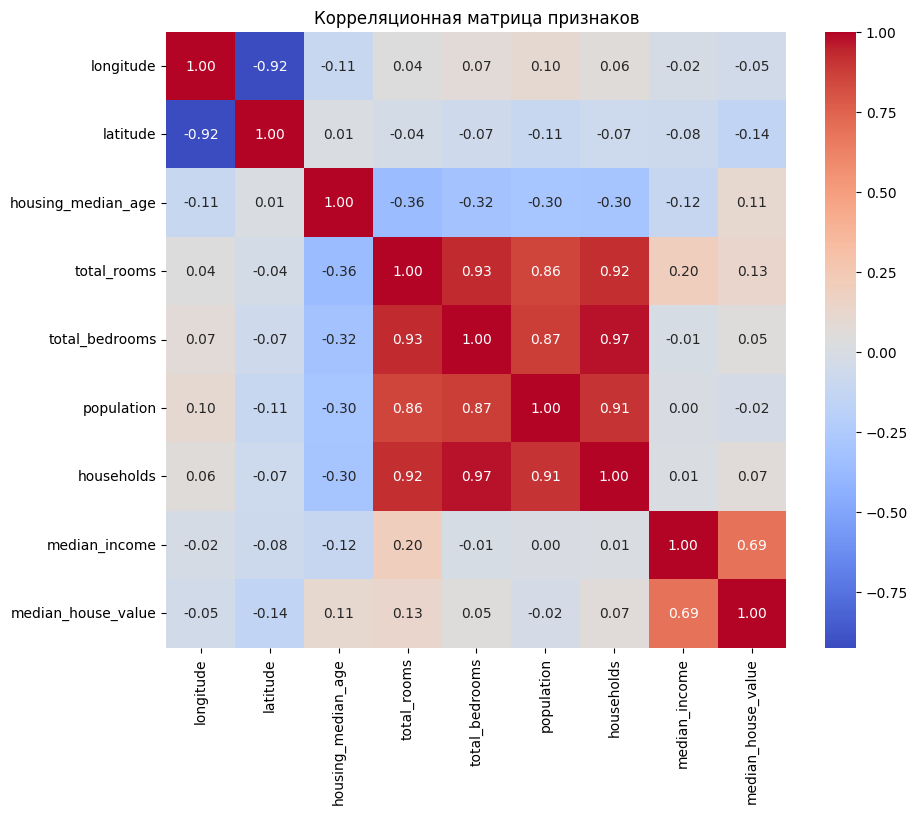

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_corr_matrix(df):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Корреляционная матрица признаков")
    plt.show()

draw_corr_matrix(df)

**!!! ВАЖНО !!!**

**ЕСЛИ МЫ СОБИРАЕМСЯУЧИТЬ ЛИНЕЙНУЮ МОДЕЛЬ, И ДАННЫЕ КОРРЕЛИРУЮТ (МУЛЬТИКОЛЛИНЕАРНОСТЬ), ТО НУЖНО ЛИБО УДАЛИТЬ ОДИН ИЗ ПРИЗНАКОВ, ЛИБО СОЗДАТЬ НОВЫЙ ПРИЗНАК НА ИХ ОСНОВЕ И ИХ УДАЛИТЬ**

### 1.3. Подготовка датасета под разные задачи

Cравнение подготовки

| Модель                  | Масштабирование | Корреляция критична | Выбросы критичны | Feature Engineering рекомендуем                  |
| ----------------------- | --------------- | ------------------- | ---------------- | ------------------------------------------------ |
| Линейная регрессия      | Да              | Да                  | Да               | Полиномы, логарифмы, отношения                   |
| Random Forest Regressor | Нет             | Нет                 | Нет              | Соотношения, интеракции                          |
| XGBoost Regressor       | Нет             | Нет                 | Нет              | Соотношения, интеракции, логарифмы (опционально) |

#### 1.3.1 Линейная регрессия (Linear Regression / Ridge / Lasso)

**Особенности модели:**

- Чувствительна к масштабу признаков и мультиколлинеарности.
- Чувствительна к выбросам.

In [12]:
if 'ocean_proximity' in df.columns:
    df = df.drop(columns=['ocean_proximity'])

Сделаем копию датасета

In [13]:
df_linear = df.copy()

Рассмотрим скошенность данных

***Определение 2: Скошенность – это мера асимметрии распределения признака***

* **Скошенность > 0 (положительная):** Хвост распределения тянется вправо (большие значения встречаются реже).

* **Скошенность < 0 (отрицательная):** Хвост распределения тянется влево (малые значения редки).

* **Скошенность ≈ 0:** Практически нормальное распределение (симметричное).


In [14]:
skew_values = df_linear.skew()
skew_values_hard = skew_values[abs(skew_values) > 0.5]  # выделяем сильноскошенные данные
print(skew_values_hard)  # сильно скошенные

skew_columns_hard = list(skew_values_hard.index)
print(f'Скошенные столбцы {skew_columns_hard}')


total_rooms           4.147343
total_bedrooms        3.481141
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64
Скошенные столбцы ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


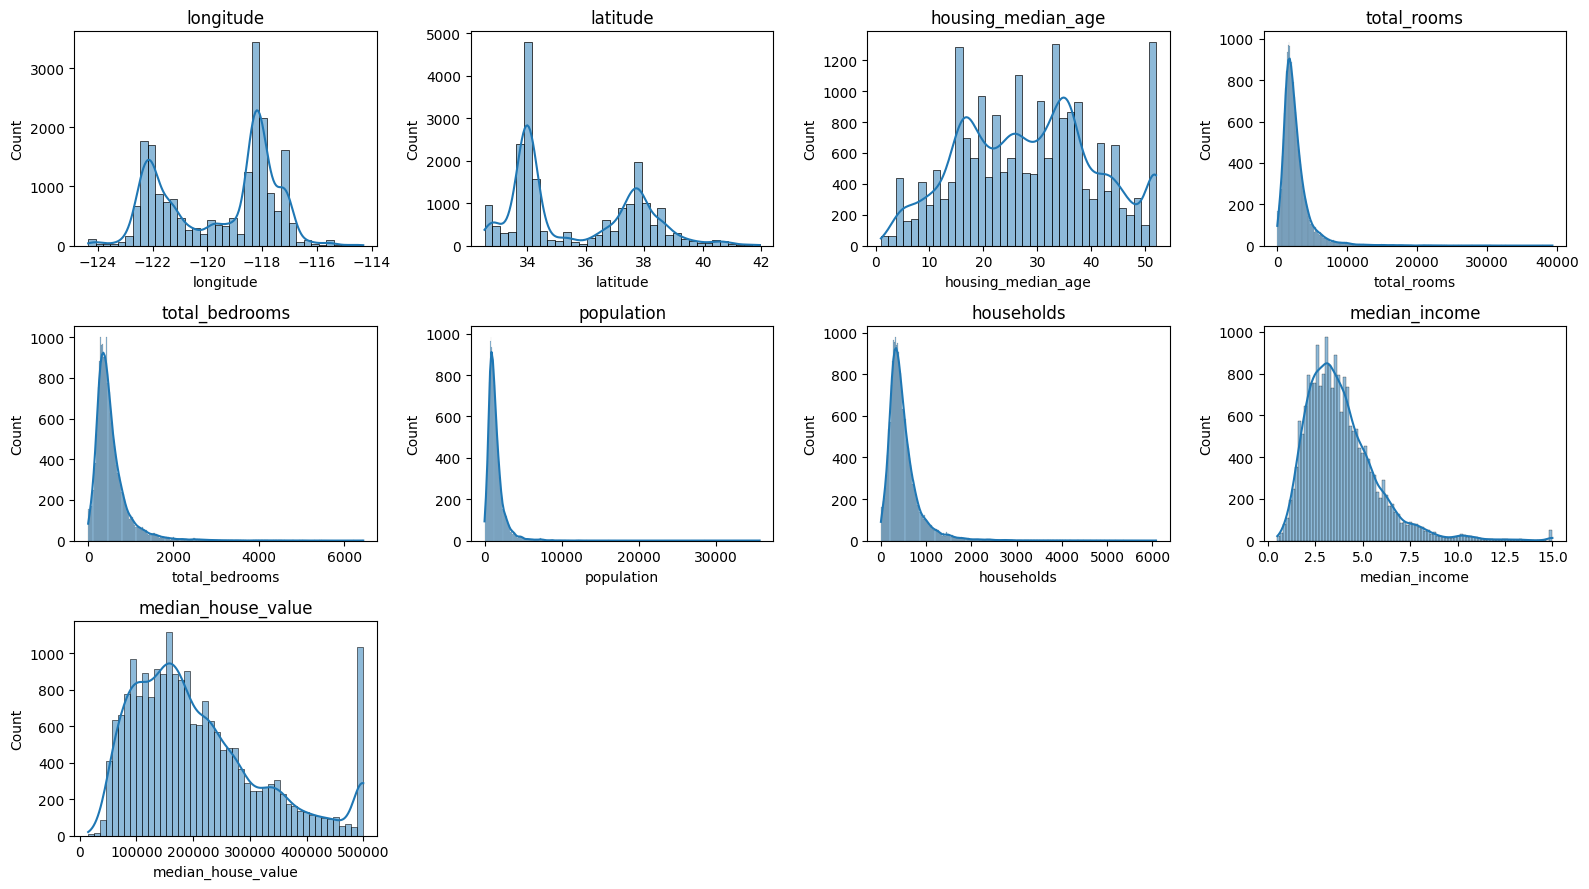

In [15]:
import math

def draw_skew(df: pd.DataFrame, n_cols=4):
    float_cols = df.select_dtypes(include='float').columns
    n_rows = math.ceil(len(float_cols) / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
    axs = axs.flatten()  # делаем одномерным массивом для удобства

    for i, col in enumerate(float_cols):
        sns.histplot(df[col], kde=True, ax=axs[i])
        axs[i].set_title(f'{col}')

    # Если графиков меньше, чем ячеек в сетке, скрываем лишние
    for j in range(i+1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()


draw_skew(df_linear)

total_rooms, total_bedrooms, population, households: Все эти признаки имеют выраженное смещение вправо, большинство районов характеризуются небольшим количеством комнат, спален, жителей и домохозяйств, но встречаются выбросы с очень большими значениями

median_income: Доходы населения распределены неравномерно, всплеск наблюдается в диапазоне от 2 до 5 условных единиц

longitude, latitude: Распределения по координатам сегментированы: локальные максимумы связаны с крупными городами и густонаселенными районами Калифорнии

housing_median_age: Практически равномерное распределение, наблюдаются районы с любым возрастом домов от 1 до 52 лет

Можно уменьшить влияние скошенности с помошью:

- Логарифмирование (Уменьшаем положительный хвост)
- Квадратный корень  (сглаживаем умеренные хвосты)
- `Box-Cox` или `Yeo-Johnson` трансформации (более гибкие)

Мы же просто прологарифмируем :)

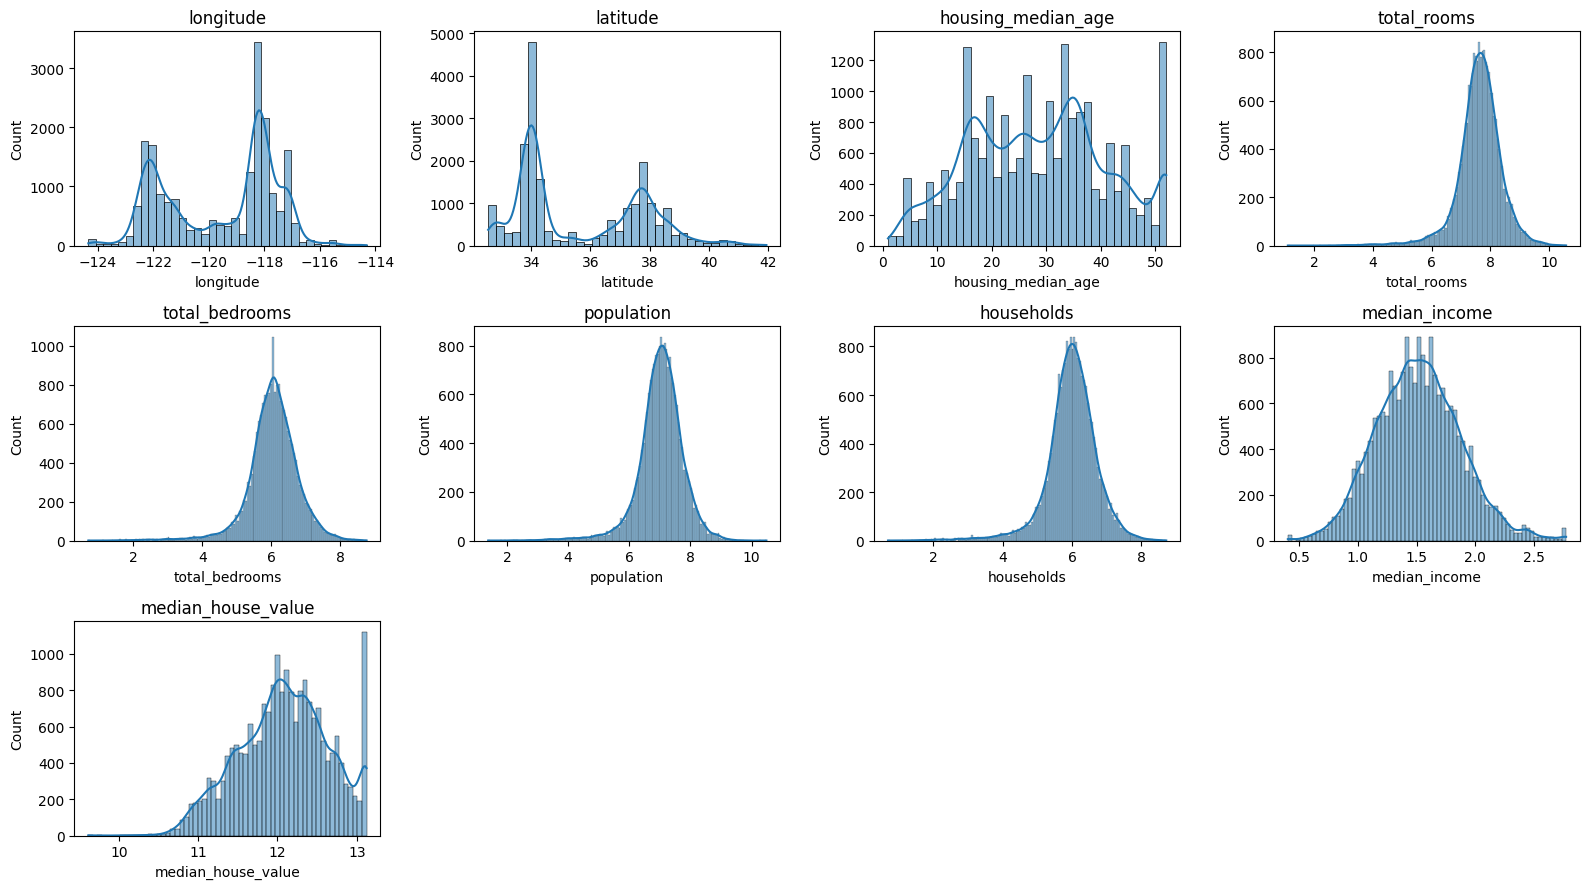

In [16]:
def prepare_skew(df: pd.DataFrame, columns: list[str]):
    for col in columns:
        df[col] = np.log1p(df[col])
    return df

df_linear = prepare_skew(df = df_linear, columns = skew_columns_hard)

draw_skew(df_linear)

Сделаем `Feature Engineering` (4 штуки)

Определение 3. Feature Engineering - процесс добавления новых зависимостей признаков.

In [17]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

df_linear['rooms_sqrt'] = df_linear['total_rooms'] ** 0.5

df_linear['lat_long'] = df_linear['latitude'] * df_linear['longitude']

df_linear['rooms_per_household'] = df_linear['total_rooms'] / df_linear['households']

df_linear['bedrooms_per_room'] = df_linear['total_bedrooms'] / df_linear['total_rooms']

if USE_AUTO_POLY:
    from sklearn.preprocessing import PolynomialFeatures

    numeric_features = df_linear.select_dtypes(include='number').drop('median_house_value', axis=1, errors='ignore')
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(numeric_features)

    poly_columns = [f"poly_{col}" for col in poly.get_feature_names_out(numeric_features.columns)]
    poly_df = pd.DataFrame(poly_features, columns=poly_columns, index=df_linear.index)

    df_linear = pd.concat([df_linear, poly_df], axis=1)


In [18]:
if not USE_AUTO_POLY:
    draw_corr_matrix(df_linear)
else:
    print(df_linear.corr())

                                            longitude  latitude  \
longitude                                    1.000000 -0.924664   
latitude                                    -0.924664  1.000000   
housing_median_age                          -0.108197  0.011173   
total_rooms                                  0.029337 -0.032319   
total_bedrooms                               0.060528 -0.067937   
...                                               ...       ...   
poly_lat_long rooms_per_household            0.733730 -0.810020   
poly_lat_long bedrooms_per_room              0.798718 -0.828932   
poly_rooms_per_household^2                  -0.056132  0.123573   
poly_rooms_per_household bedrooms_per_room   0.008390  0.085729   
poly_bedrooms_per_room^2                     0.097474 -0.113460   

                                            housing_median_age  total_rooms  \
longitude                                            -0.108197     0.029337   
latitude                             

In [19]:
if not USE_AUTO_POLY:
    draw_skew(df_linear, 5)

In [20]:
from sklearn.model_selection import train_test_split

X_linear = df_linear.drop('median_house_value', axis=1)
y_linear = df_linear['median_house_value']

X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=RND_SEED
)

Разделение датасета на признаки и целевую переменную

Данные для обучения модели нужно стандартизировать

***Определение 4: Стандартизация признаков — это метод преобразования числовых признаков так, чтобы они имели среднее значение 0 и стандартное отклонение 1. Это важный шаг в подготовке данных для моделей, чувствительных к масштабу признаков, например линейной регрессии, логистической регрессии, SVM, KNN.***

**Как это работает**

Для каждого признака $x$ вычисляется:

$$
x_\text{scaled} = \frac{x - \mu}{\sigma}
$$

где:

* $\mu$ — среднее значение признака в обучающей выборке,
* $\sigma$ — стандартное отклонение признака.

После стандартизации:

* Среднее значение нового признака ≈ 0
* Стандартное отклонение ≈ 1


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_linear_scaled = scaler.fit_transform(X_train_linear)  # вычисляет среднее и стандартное отклонение (только на train)
X_test_linear_scaled = scaler.transform(X_test_linear)  # применяет эти параметры к любым данным (train, test, новые данные)

#### 1.3.2 Random Forest Regressor

**Особенности модели:**

* Не чувствительна к масштабу признаков.
* Может обрабатывать сильные корреляции между признаками.
* Может использовать категориальные признаки, если они закодированы как числовые.


Сделаем копию датасета

In [22]:
df_forest = df.copy()

Feature engineering

In [23]:
df_forest['rooms_sqrt'] = df_forest['total_rooms'] ** 0.5

df_forest['lat_long'] = df_forest['latitude'] * df_forest['longitude']

df_forest['rooms_per_household'] = df_forest['total_rooms'] / df_forest['households']

df_forest['bedrooms_per_room'] = df_forest['total_bedrooms'] / df_forest['total_rooms']

df_forest = prepare_skew(df = df_forest, columns = skew_columns_hard)

Разделение выборки

In [24]:
X_forest = df_forest.drop(columns=['median_house_value'])
y_forest = df_forest['median_house_value']

X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(
    X_forest, y_forest, test_size=0.2, random_state=RND_SEED
)

#### 1.3.3 XGBoost

**Особенности модели:**

* Градиентный бустинг деревьев.
* Не чувствителен к масштабу.
* Может обрабатывать коррелированные признаки, но слишком много слабых признаков может замедлить обучение.

Сделаем копию датасета

In [25]:
df_xgboost = df.copy()

Feature engineering

In [26]:
df_xgboost['rooms_sqrt'] = df_xgboost['total_rooms'] ** 0.5

df_xgboost['lat_long'] = df_xgboost['latitude'] * df_xgboost['longitude']

df_xgboost['rooms_per_household'] = df_xgboost['total_rooms'] / df_xgboost['households']

df_xgboost['bedrooms_per_room'] = df_xgboost['total_bedrooms'] / df_xgboost['total_rooms']

df_xgboost = prepare_skew(df = df_xgboost, columns = skew_columns_hard)

Разделение выборки

In [27]:
X_xgboost = df_xgboost.drop(columns=['median_house_value'])
y_xgboost = df_xgboost['median_house_value']

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = train_test_split(
    X_xgboost, y_xgboost, test_size=0.2, random_state=RND_SEED
)

## 2. Создание метрик

1. **MSE (Mean Squared Error)** – средняя квадратичная ошибка:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

* Чем меньше, тем лучше.
* Чувствительна к выбросам (квадрат ошибки усиливает влияние больших отклонений).

2. **RMSE (Root Mean Squared Error)** – корень из MSE:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

* В тех же единицах, что и целевая переменная.
* Легче интерпретировать.

3. **MAE (Mean Absolute Error)** – средняя абсолютная ошибка:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

* Менее чувствительна к выбросам, показывает «среднюю ошибку» в исходных единицах.

4. **R² (коэффициент детерминации)**:

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

* 1 → идеальное предсказание, 0 → модель не лучше среднего, <0 → хуже среднего.

**Как интерпретировать**

| Метрика | Как читать                    | Что значит для анализа                                                   |
| ------- | ----------------------------- | ------------------------------------------------------------------------ |
| MSE     | Чем меньше, тем точнее        | Показывает среднюю квадратичную ошибку. Выбросы сильно влияют.           |
| RMSE    | В тех же единицах, что и цель | Удобно для прямой интерпретации ошибок.                                  |
| MAE     | Средняя абсолютная ошибка     | Устойчивее к выбросам, показывает среднюю фактическую ошибку.            |
| R²      | 0–1 (или <0)                  | 1 — идеальное совпадение, 0 — предсказывает среднее, <0 — хуже среднего. |

**Пример анализа:**

* Если RMSE и MAE сильно отличаются → есть выбросы.
* Если R² близок к 1 → модель хорошо объясняет вариацию данных.
* Можно сравнивать модели: линейная, RF, XGBoost. Та, у которой меньше RMSE/MAE и выше R² — более точная.


In [28]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

def get_metrics(y_true, y_pred):
    return {
        'MSE': mse(y_true, y_pred),
        'RMSE': rmse(y_true, y_pred),
        'MAE': mae(y_true, y_pred),
        'R2': r2(y_true, y_pred)
    }

## 3. Базовая модель линейной регрессии (аналитическое решение)

In [29]:
# Создание линейной модели
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [30]:
# Обучение
lr.fit(X_train_linear_scaled, y_train_linear)

LinearRegression()

In [31]:
# Прогонка и метрики
y_pred = lr.predict(X_test_linear_scaled)
lr_metrics = get_metrics(y_test_linear, y_pred)
lr_metrics

{'MSE': np.float64(0.09053672583635461),
 'RMSE': np.float64(0.30089321334379515),
 'MAE': np.float64(0.2136252380786773),
 'R2': np.float64(0.7249359508251925)}

## 4. Улучшенная версия линейной регрессии

In [32]:
from sklearn.linear_model import SGDRegressor

### 4.1. Градиентный спуск (симуляция)

In [84]:
# Создание линейной модели градиентного спуска
lr_gd = SGDRegressor(
    max_iter=2000,               # максимум итераций
    tol=1e-6,                    # остановка, когда улучшение < tol
    learning_rate='constant',  # тип изменения шага
    eta0=0.00001,                   # стартовый шаг
    penalty='l2',                # регуляризация L2 (Ridge)
    shuffle=False,               # важный момент: не перемешиваем данные, чтобы был настоящий GD
    random_state=RND_SEED
)

In [85]:
# Обучение
lr_gd.fit(X_train_linear_scaled, y_train_linear)

SGDRegressor(eta0=1e-05, learning_rate='constant', max_iter=2000,
             random_state=21, shuffle=False, tol=1e-06)

In [86]:
# Прогонка и метрики
y_pred = lr_gd.predict(X_test_linear_scaled)
lr_gd_metrics = get_metrics(y_test_linear, y_pred)
lr_gd_metrics

{'MSE': np.float64(0.09822035252622865),
 'RMSE': np.float64(0.31340126439794186),
 'MAE': np.float64(0.23428924832605819),
 'R2': np.float64(0.7015919492596342)}

### 4.2. Стохастический градиентный спуск

In [36]:
# Инициализация модели
lr_sgd = SGDRegressor(
    max_iter=2000,                # максимум итераций
    tol=1e-6,                     # остановка, когда улучшение < tol
    learning_rate='invscaling',   # тип изменения шага
    eta0=0.01,                    # стартовый шаг
    penalty='l1',                 # регуляризация L2 (Ridge)
    random_state=RND_SEED
)

In [37]:
# Обучение
lr_sgd.fit(X_train_linear_scaled, y_train_linear)

SGDRegressor(max_iter=2000, penalty='l1', random_state=21, tol=1e-06)

In [38]:
# Прогонка и метрики
y_pred = lr_sgd.predict(X_test_linear_scaled)
lr_sgd_metrics = get_metrics(y_test_linear, y_pred)
lr_sgd_metrics

{'MSE': np.float64(0.09913065848504314),
 'RMSE': np.float64(0.3148502159520351),
 'MAE': np.float64(0.23616439165372902),
 'R2': np.float64(0.6988263042608074)}

### 4.3. Линейная модель с регуляризацией Rigde (L2)

In [39]:
# Инициализация модели
from sklearn.linear_model import Ridge
lr_ridge = Ridge(alpha=1.0)

In [40]:
# Обучение
lr_ridge.fit(X_train_linear_scaled, y_train_linear)

Ridge()

In [41]:
# Прогонка и метрики
y_pred = lr_ridge.predict(X_test_linear_scaled)
lr_ridge_metrics = get_metrics(y_test_linear, y_pred)
lr_ridge_metrics

{'MSE': np.float64(0.0936912695916482),
 'RMSE': np.float64(0.30609029646764074),
 'MAE': np.float64(0.22489714220701998),
 'R2': np.float64(0.7153519773534929)}

### 4.3. Линейная модель с регуляризацией Lasso (L1)

In [42]:
# Инициализация модели
from sklearn.linear_model import Lasso
lr_lasso = Lasso(alpha=0.01)

In [43]:
# Обучение
lr_lasso.fit(X_train_linear_scaled, y_train_linear)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.274e+00, tolerance: 5.326e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [44]:
# Прогонка и метрики
y_pred = lr_lasso.predict(X_test_linear_scaled)
lr_lasso_metrics = get_metrics(y_test_linear, y_pred)
lr_lasso_metrics

{'MSE': np.float64(0.11090058567427222),
 'RMSE': np.float64(0.3330173954529586),
 'MAE': np.float64(0.2510172731063894),
 'R2': np.float64(0.663067513546266)}

### 4.4. Линейная модель с регуляризацией ElasticNet (комбинация L1+L2)

In [45]:
# Инициализация модели
from sklearn.linear_model import ElasticNet
lr_enet = ElasticNet(alpha=0.01, l1_ratio=0.5)

In [46]:
# Обучение
lr_enet.fit(X_train_linear_scaled, y_train_linear)

ElasticNet(alpha=0.01)

In [47]:
# Прогонка и метрики
y_pred = lr_enet.predict(X_test_linear_scaled)
lr_enet_metrics = get_metrics(y_test_linear, y_pred)
lr_enet_metrics

{'MSE': np.float64(0.1068839989422503),
 'RMSE': np.float64(0.32693118380211195),
 'MAE': np.float64(0.24539040355278033),
 'R2': np.float64(0.6752705018934337)}

## 4. Случайный лес регрессор

In [48]:
# Инициализация модели
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,      # количество деревьев
    max_depth=None,        # глубина деревьев
    random_state=RND_SEED,
    n_jobs=-1              # использовать все ядра процессора
)

In [49]:
# Обучение
rf.fit(X_train_forest, y_train_forest)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=21)

In [50]:
# Прогонка и метрики
y_pred = rf.predict(X_test_forest)
rf_metrics = get_metrics(y_test_forest, y_pred)
rf_metrics

{'MSE': np.float64(0.05483249880270303),
 'RMSE': np.float64(0.23416340192844617),
 'MAE': np.float64(0.16016662551844907),
 'R2': np.float64(0.8334107070062833)}

## 5. Градиентный бустинг (XGBoost)

In [51]:
# Инициализация модели
import xgboost
xgb = xgboost.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RND_SEED
)

In [52]:
# Обучение
xgb.fit(X_train_xgboost, y_train_xgboost)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [53]:
# Прогонка и метрики
y_pred = xgb.predict(X_test_xgboost)
xgb_metrics = get_metrics(y_test_xgboost, y_pred)
xgb_metrics

{'MSE': np.float64(0.05290999700622203),
 'RMSE': np.float64(0.23002173159556474),
 'MAE': np.float64(0.16200377609537917),
 'R2': np.float64(0.8392515536218516)}

## 5. Feature Importance

### 5.1 Linear Regression


В **линейных моделях** (LinearRegression, Ridge, Lasso) **feature importance** — это не что иное, как **коэффициенты модели (`coef_`)**.

Но есть нюансы:

* Коэффициенты сами по себе могут быть несопоставимы по масштабу признаков.
* Поэтому мы правильно сделали **стандартизацию (StandardScaler)** → теперь коэффициенты отражают вклад признаков.
* Знак коэффициента (+ / -) показывает направление влияния:

  * `+` → признак увеличивает предсказание качества вина,
  * `-` → уменьшает.


/tmp/ipython-input-1675465040.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


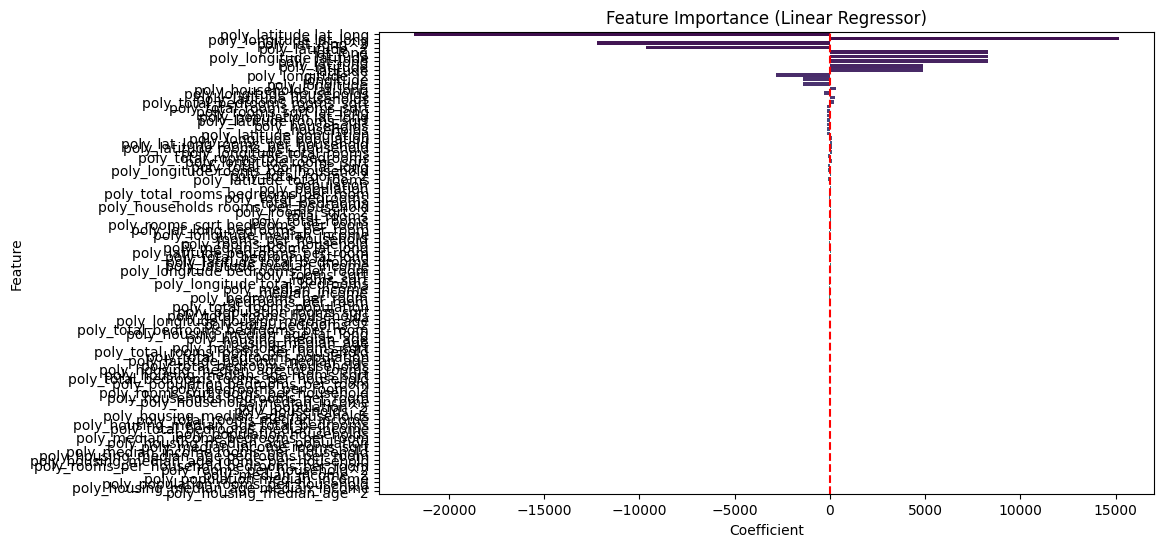

In [54]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (Linear Regressor)')
plt.show()

### 5.2 Linear Regression (GD)


/tmp/ipython-input-1425956437.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


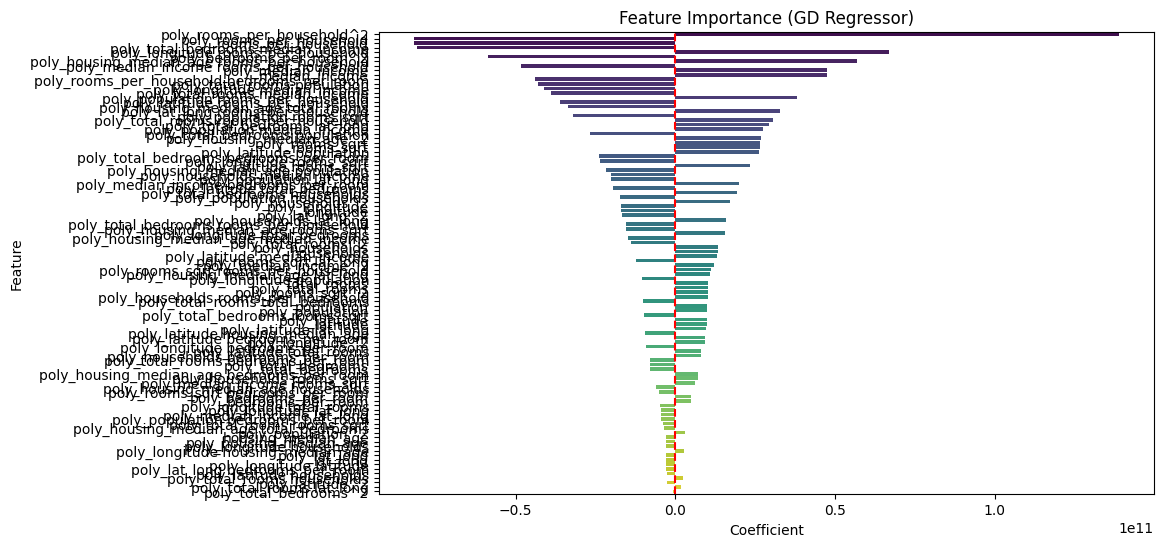

In [55]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_gd.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (GD Regressor)')
plt.show()

### 5.3 Linear Regression (SGD)


/tmp/ipython-input-1165310945.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


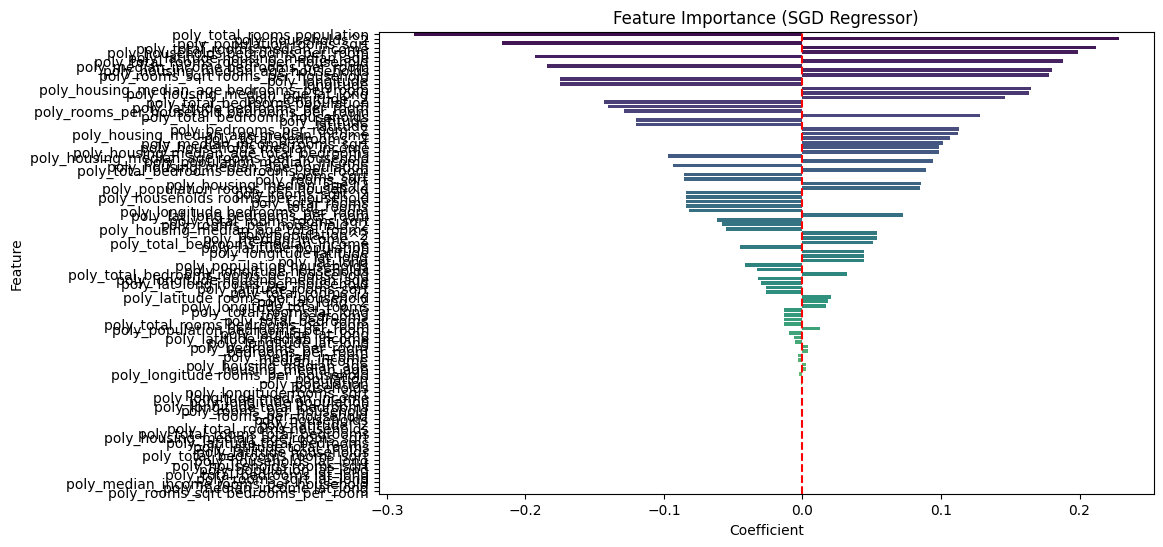

In [56]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_sgd.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (SGD Regressor)')
plt.show()

### 5.4 Linear Regression (Rigde)


/tmp/ipython-input-647660009.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


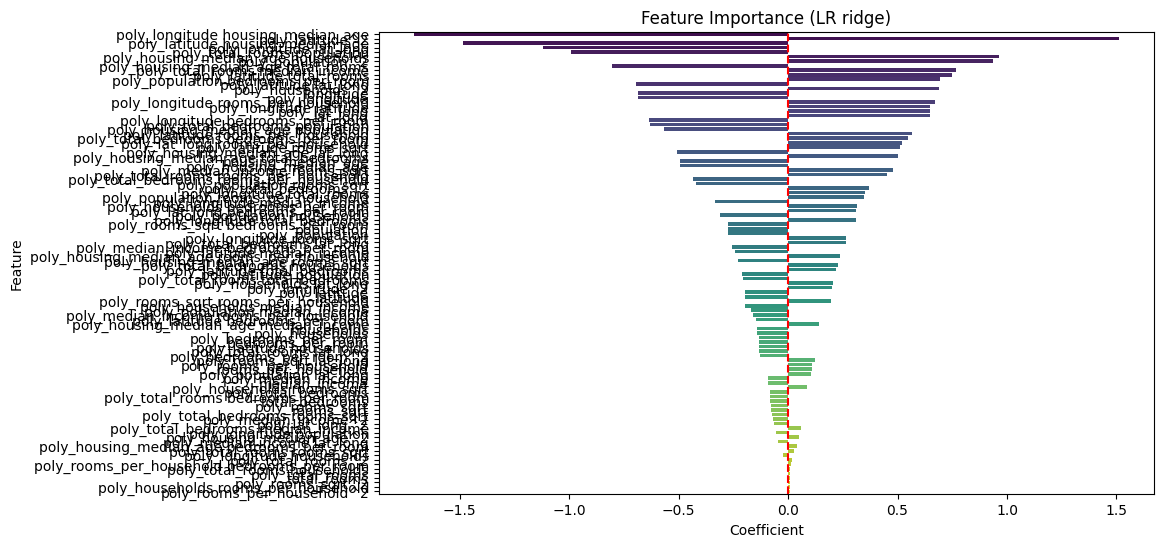

In [57]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR ridge)')
plt.show()

### 5.5 Linear Regression (Lasso)


/tmp/ipython-input-4184585031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


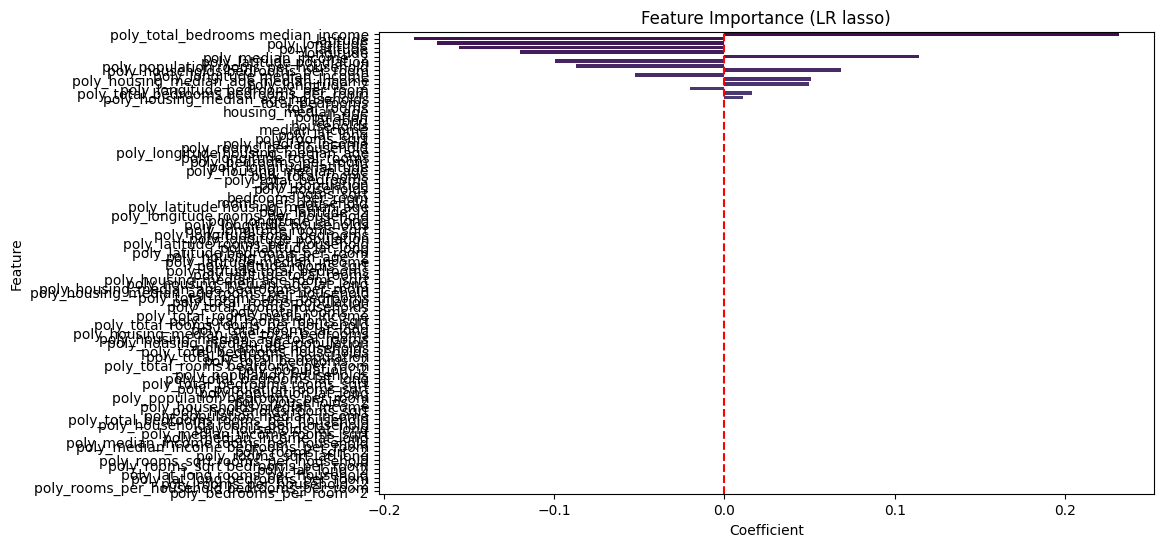

In [58]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR lasso)')
plt.show()

### 5.6 Linear Regression (ElasticNet)


/tmp/ipython-input-319265374.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


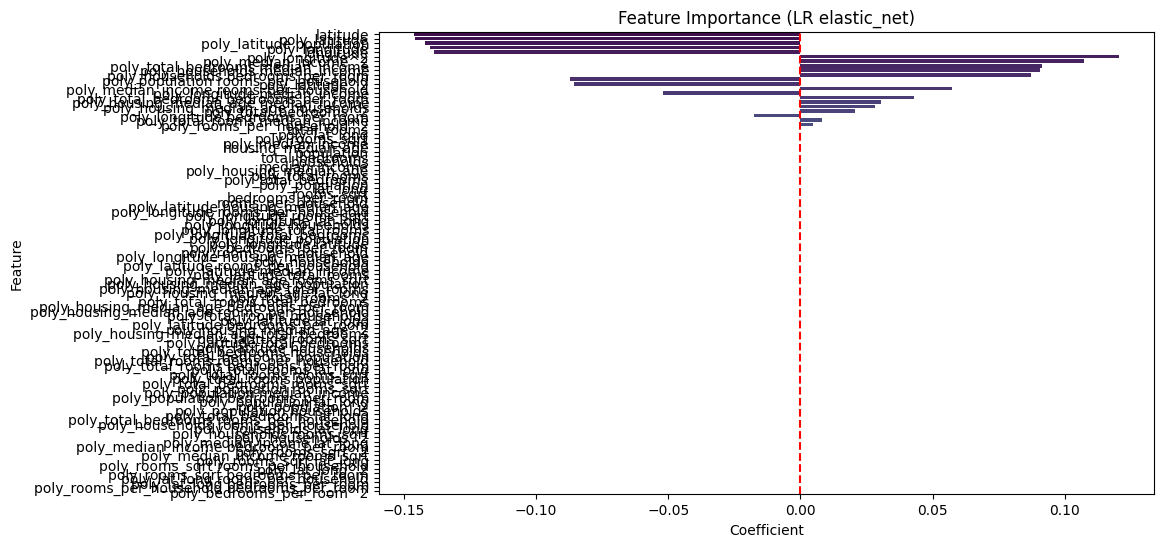

In [59]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_enet.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR elastic_net)')
plt.show()

### 5.7 Random Forest


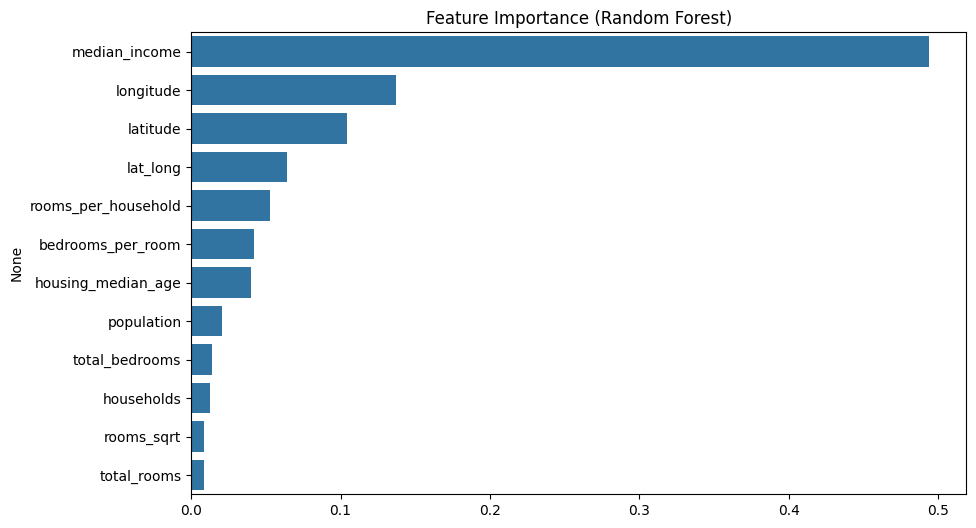

In [60]:
feature_importances = pd.Series(rf.feature_importances_, index=X_forest.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

### 5.6 XGBoost

<Figure size 1000x600 with 0 Axes>

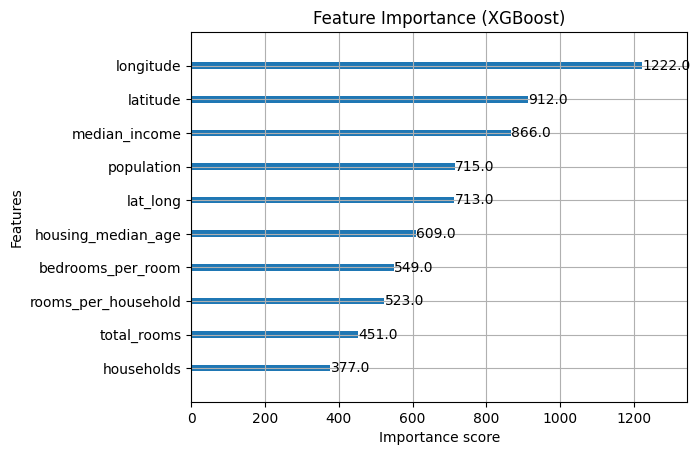

In [61]:
plt.figure(figsize=(10,6))
xgboost.plot_importance(xgb, importance_type='weight', max_num_features=10)
plt.title("Feature Importance (XGBoost)")
plt.show()

## 8. Написание своих реализаций (классы)

- LR
- LR + GD
- LR + SGD

In [106]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class CustomLinearModel:
    """
    Кастомная реализация линейной регрессии через нормальное уравнение
    """
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_extended = np.column_stack([np.ones(X.shape[0]), X])

        coefficients = np.linalg.pinv(X_extended.T @ X_extended) @ X_extended.T @ y

        self.intercept_ = coefficients[0]
        self.coef_ = coefficients[1:]

        return self

    def predict(self, X):
        return X @ self.coef_ + self.intercept_

class GradientOptimizedLinearModel:
    """
    Линейная регрессия с градиентным спуском
    """
    def __init__(self, learning_rate=0.001, max_epochs=20000, convergence_threshold=1e-6):
        self.lr = learning_rate
        self.max_epochs = max_epochs
        self.threshold = convergence_threshold
        self.coef_ = None
        self.intercept_ = None
        self.loss_progress = []
        self.feature_scaler = StandardScaler()

    def fit(self, X, y):
        X_processed = self.feature_scaler.fit_transform(X)
        y_processed = np.array(y).ravel()

        n_observations, n_features = X_processed.shape

        self.coef_ = np.random.normal(0, 0.01, n_features)
        self.intercept_ = 0.0

        self.target_mean = np.mean(y_processed)
        self.target_std = np.std(y_processed)
        y_normalized = (y_processed - self.target_mean) / (self.target_std + 1e-8)

        best_weights = self.coef_.copy()
        best_bias = self.intercept_
        min_loss = float('inf')

        for epoch in range(self.max_epochs):
            predictions = X_processed @ self.coef_ + self.intercept_
            residuals = predictions - y_normalized

            grad_weights = (X_processed.T @ residuals) / n_observations
            grad_bias = np.mean(residuals)

            self.coef_ -= self.lr * grad_weights
            self.intercept_ -= self.lr * grad_bias

            current_loss = np.mean(residuals ** 2)
            self.loss_progress.append(current_loss)

            if current_loss < min_loss:
                min_loss = current_loss
                best_weights = self.coef_.copy()
                best_bias = self.intercept_

            if epoch > 100 and abs(self.loss_progress[-100] - current_loss) < self.threshold:
                break

        self.coef_ = best_weights
        self.intercept_ = best_bias

        return self

    def predict(self, X):
        X_scaled = self.feature_scaler.transform(X)
        predictions_normalized = X_scaled @ self.coef_ + self.intercept_
        return predictions_normalized * self.target_std + self.target_mean

class StochasticGradientLinearModel:
    """
    Линейная регрессия со стохастическим градиентным спуском
    """
    def __init__(self, learning_rate=0.001, max_epochs=20000, batch_size=64, convergence_threshold=1e-6):
        self.lr = learning_rate
        self.max_epochs = max_epochs
        self.batch_size = batch_size
        self.threshold = convergence_threshold
        self.coef_ = None
        self.intercept_ = None
        self.loss_progress = []
        self.feature_scaler = StandardScaler()

    def fit(self, X, y):
        X_processed = self.feature_scaler.fit_transform(X)
        y_processed = np.array(y).ravel()

        n_samples, n_features = X_processed.shape

        self.coef_ = np.random.normal(0, 0.01, n_features)
        self.intercept_ = 0.0

        self.target_mean = np.mean(y_processed)
        self.target_std = np.std(y_processed)
        y_normalized = (y_processed - self.target_mean) / (self.target_std + 1e-8)

        best_weights = self.coef_.copy()
        best_bias = self.intercept_
        min_loss = float('inf')

        for epoch in range(self.max_epochs):
            indices = np.random.permutation(n_samples)
            X_shuffled = X_processed[indices]
            y_shuffled = y_normalized[indices]

            epoch_loss = 0
            batch_count = 0

            for i in range(0, n_samples, self.batch_size):
                batch_end = i + self.batch_size
                X_batch = X_shuffled[i:batch_end]
                y_batch = y_shuffled[i:batch_end]
                current_batch_size = X_batch.shape[0]

                batch_predictions = X_batch @ self.coef_ + self.intercept_
                batch_residuals = batch_predictions - y_batch

                grad_weights = (X_batch.T @ batch_residuals) / current_batch_size
                grad_bias = np.mean(batch_residuals)

                self.coef_ -= self.lr * grad_weights
                self.intercept_ -= self.lr * grad_bias

                batch_loss = np.mean(batch_residuals ** 2)
                epoch_loss += batch_loss
                batch_count += 1

            avg_epoch_loss = epoch_loss / batch_count
            self.loss_progress.append(avg_epoch_loss)

            if avg_epoch_loss < min_loss:
                min_loss = avg_epoch_loss
                best_weights = self.coef_.copy()
                best_bias = self.intercept_

            # Критерий остановки
            if epoch > 100 and abs(np.mean(self.loss_progress[-50:]) - avg_epoch_loss) < self.threshold:
                break

        self.coef_ = best_weights
        self.intercept_ = best_bias

        return self

    def predict(self, X):
        X_scaled = self.feature_scaler.transform(X)
        predictions_normalized = X_scaled @ self.coef_ + self.intercept_
        return predictions_normalized * self.target_std + self.target_mean

def evaluate_model_performance(y_actual, y_predicted):
    """
    Вычисление метрик качества модели
    """
    squared_errors = np.mean((y_actual - y_predicted) ** 2)
    absolute_errors = np.mean(np.abs(y_actual - y_predicted))

    metrics = {
        'MSE': squared_errors,
        'RMSE': np.sqrt(squared_errors),
        'MAE': absolute_errors,
        'R2': 1 - (np.sum((y_actual - y_predicted) ** 2) /
                   np.sum((y_actual - np.mean(y_actual)) ** 2))
    }
    return metrics

X_train_data, X_test_data, y_train_data, y_test_data = X_train_linear, X_test_linear, y_train_linear, y_test_linear

use_target_scaling = False
target_scaler = None

if use_target_scaling:
    target_scaler = StandardScaler()
    y_train_scaled = target_scaler.fit_transform(y_train_data.values.reshape(-1, 1)).ravel()
    y_test_scaled = target_scaler.transform(y_test_data.values.reshape(-1, 1)).ravel()
else:
    y_train_scaled = np.array(y_train_data).ravel()
    y_test_scaled = np.array(y_test_data).ravel()

regression_models = {
    'AnalyticalSolution': CustomLinearModel(),
    'GradientDescent': GradientOptimizedLinearModel(learning_rate=0.001, max_epochs=20000),
    'StochasticGradient': StochasticGradientLinearModel(learning_rate=0.001, max_epochs=20000, batch_size=128)
}

results = {}

print("Сравнение алгоритмов линейной регрессии:\n")

for model_name, model in regression_models.items():
    print(f"Обучение {model_name}...")

    model.fit(X_train_data, y_train_scaled)
    predictions = model.predict(X_test_data)

    if use_target_scaling and target_scaler is not None:
        predictions = target_scaler.inverse_transform(predictions.reshape(-1, 1)).ravel()
        actual_values = y_test_data
    else:
        actual_values = y_test_data

    performance_metrics = evaluate_model_performance(actual_values, predictions)
    results[model_name] = performance_metrics

    print(f"{model_name}:")
    print(f"  MSE: {performance_metrics['MSE']:.4f}")
    print(f"  RMSE: {performance_metrics['RMSE']:.4f}")
    print(f"  MAE: {performance_metrics['MAE']:.4f}")
    print(f"  R²: {performance_metrics['R2']:.4f}")
    print()

Сравнение алгоритмов линейной регрессии:

Обучение AnalyticalSolution...
AnalyticalSolution:
  MSE: 0.1010
  RMSE: 0.3178
  MAE: 0.2350
  R²: 0.6932

Обучение GradientDescent...
GradientDescent:
  MSE: 0.1032
  RMSE: 0.3213
  MAE: 0.2397
  R²: 0.6864

Обучение StochasticGradient...
StochasticGradient:
  MSE: 0.0977
  RMSE: 0.3125
  MAE: 0.2336
  R²: 0.7033



## 9. Итоги

Что сделать?

1. Сгрупировать все метрики, и выяснить, какой методо сработал лучше всего и почему?
2. Ответить на вопросы:

    1. Что такое регрессия и чем она отличается от классификации?
    2. Какова целевая переменная в задаче регрессии?
    3. Зачем нужно масштабирование признаков перед обучением линейной регрессии?
    4. Что означает коэффициент признака в линейной регрессии?
    5. Что такое MSE, RMSE, MAE и R², и чем они отличаются?
    6. В чем разница между Ridge и Lasso регуляризацией?
    7. Почему деревья решений и Random Forest не требуют стандартизации признаков?
    8. Что такое мультиколлинеарность и почему она мешает линейной регрессии?
    9. Как можно уменьшить влияние выбросов на линейную регрессию?
    10. Какие гиперпараметры наиболее важны для Random Forest Regressor?
    11. Какие гиперпараметры наиболее важны для XGBoost в задаче регрессии?
    12. Что значит глубина дерева (max\_depth) и как она влияет на модель?
    13. Зачем нужен `learning_rate` в градиентном бустинге?
    14. Как можно оценить важность признаков (feature importance) в линейной регрессии, случайном лесу и XGBoost?
    15. Почему XGBoost часто работает лучше, чем Random Forest, на структурированных данных?
    16. Что такое переобучение и как его можно выявить на графике обучения?
    17. Как работает метод ансамблирования в Random Forest (bagging)?
    18. В чем отличие бустинга от бэггинга?
    19. Какие способы feature engineering можно применить к винному датасету (Wine Quality)?
    20. Как использовать кросс-валидацию для подбора гиперпараметров моделей регрессии?


#### 9.1. Группировка метрик


ТАБЛИЦА МЕТРИК:
----------------------------------------------------------------------------------------------------
                         Model    MSE   RMSE    MAE     R²
                       XGBoost 0.0529 0.2300 0.1620 0.8393
                 Random Forest 0.0548 0.2342 0.1602 0.8334
             Linear Regression 0.0905 0.3009 0.2136 0.7249
     Linear Regression (Ridge) 0.0937 0.3061 0.2249 0.7154
                      MyLR_SGD 0.0977 0.3125 0.2336 0.7033
        Linear Regression (GD) 0.0982 0.3134 0.2343 0.7016
       Linear Regression (SGD) 0.0991 0.3149 0.2362 0.6988
                          MyLR 0.1010 0.3178 0.2350 0.6932
                       MyLR_GD 0.1032 0.3213 0.2397 0.6864
                LR(ElasticNet) 0.1069 0.3269 0.2454 0.6753
      Linear Regression(Lasso) 0.1109 0.3330 0.2510 0.6631
----------------------------------------------------------------------------------------------------

 ОБЩАЯ ЛУЧШАЯ МОДЕЛЬ: XGBoost

#### 9.2. Ответы на вопросы

### 1. Что такое регрессия и чем отличается от классификации?
Регрессия — задача прогнозирования количественной (непрерывной) переменной на основе признаков. Классификация — задача прогнозирования категориальной (дискретной) переменной или класса.

### 2. Какова целевая переменная в задаче регрессии?
Целевая переменная — непрерывное числовое значение (например, цена, вес, температура).

### 3. Зачем нужно масштабирование признаков перед обучением линейной регрессии?
Масштабирование выравнивает диапазоны признаков, ускоряет сходимость оптимизации и способствует стабильности численных вычислений.

### 4. Что означает коэффициент признака в линейной регрессии?
Коэффициент отражает, насколько изменение соответствующего признака влияет на прогнозируемую переменную при прочих равных условиях.

### 5. Что такое MSE, RMSE, MAE и R², и чем они отличаются?
- MSE (среднеквадратичная ошибка) — среднее значение квадратов ошибок. Чувствительна к выбросам.
- RMSE — корень из MSE, интерпретируется в тех же единицах, что и целевая переменная.
- MAE (средняя абсолютная ошибка) — среднее абсолютных ошибок, устойчивее к выбросам.
- R² (коэффициент детерминации) — доля объяснённой дисперсии, от 0 до 1, чем больше, тем лучше.

### 6. В чем разница между Ridge и Lasso регуляризацией?
Ridge (L2) штрафует сумму квадратов коэффициентов, сглаживая веса; Lasso (L1) штрафует сумму абсолютных значений, что может занулять коэффициенты и выбирать признаки.

### 7. Почему деревья решений и Random Forest не требуют стандартизации признаков?
Потому что они работают на разбиениях признаков и не зависят от их масштабов, в отличие от линейных моделей и градиентных методов.

### 8. Что такое мультиколлинеарность и почему она мешает линейной регрессии?
Это сильная корреляция между признаками, которая мешает точной оценке коэффициентов и снижает стабильность модели.

### 9. Как уменьшить влияние выбросов на линейную регрессию?
Использовать робастные методы, например, регуляризацию, преобразования признаков, удаление выбросов или альтернативные метрики ошибок.

### 10. Какие гиперпараметры наиболее важны для Random Forest Regressor?
Число деревьев (n_estimators), глубина деревьев (max_depth), минимальное число образцов в листе (min_samples_leaf).

### 11. Какие гиперпараметры наиболее важны для XGBoost в задаче регрессии?
learning_rate (шаг обучения), n_estimators, max_depth, subsample и регуляризационные параметры (lambda, alpha).

### 12. Что значит глубина дерева (max_depth) и как она влияет на модель?
Максимальная глубина дерева ограничивает сложность модели — большая глубина может привести к переобучению, малая — к недообучению.

### 13. Зачем нужен learning_rate в градиентном бустинге?
Он регулирует величину каждого шага обновления модели, помогает контролировать скорость обучения и предотвращает переобучение.

### 14. Как оценить важность признаков в линейной регрессии, случайном лесу и XGBoost?
В линейной регрессии — по абсолютным значениям коэффициентов; в случайном лесу и XGBoost — по агрегированному вкладу признака в качество разбиений (feature importance).

### 15. Почему XGBoost часто работает лучше, чем Random Forest на структурированных данных?
Потому что бустинг последовательно исправляет ошибки, строя более точные модели; а бэггинг (Random Forest) усредняет независимые деревья.

### 16. Что такое переобучение и как его можно выявить на графике обучения?
Переобучение — модель слишком точно подгоняет тренировочные данные и плохо обобщается. На графике обучения это рост разницы между ошибками на тренировке и валидации.

### 17. Как работает метод ансамблирования в Random Forest (bagging)?
Строятся множество независимых деревьев на случайных подвыборках данных, ответы усредняются для снижения ошибки.

### 18. В чем отличие бустинга от бэггинга?
Бэггинг строит независимые модели параллельно и усредняет результаты. Бустинг строит модели последовательно, каждая исправляет ошибки предыдущих.

### 19. Какие способы feature engineering можно применить к винному датасету?
Создание новых признаков из существующих, нормализация, удаление мультиколлинеарных признаков, преобразование категорий, обработка пропусков.

### 20. Как использовать кросс-валидацию для подбора гиперпараметров моделей регрессии?
Разбить данные на фолды, обучать и оценивать модель на разных фолдах, искать параметры с лучшим средним качеством, чтобы избежать переобучения.